# Portfolio Analysis of Consumer discretionary sector

### Stocks under observation:

    - Wayfair Inc. (NYSE:W)
    - Nike (NYSE:NKE)
    - Target (NYSE:TGT)
    - Amazon.com Inc. (NYSE:AMZN)
    - Home Depot (NYSE:HD)
    - Alibaba Group Holding Limited  (NYSE:BABA)

In [12]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader import data as wb
import scipy.optimize as sco
import warnings

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
np.random.seed(777)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Pulling stock data 

In [13]:
consumer = ['W', 'NKE', 'TGT', 'AMZN','HD', 'BABA' ]
data = pd.DataFrame()
for i in range(len(consumer)):
    
    df = wb.DataReader(consumer[i], data_source='yahoo', start='2019-1-1', end = '2020-5-1')
    df['stock'] = consumer[i]
    data = data.append(df[['Adj Close', 'stock']])

table = data.pivot(columns='stock')
# By specifying col[1] in below list comprehension
# You can select the stock names under multi-level column
table.columns = [col[1] for col in table.columns]
table.head()

,AMZN,BABA,HD,NKE,TGT,W
Date,,,,,,
2019-01-02,1539.130005,136.699997,166.723221,73.081116,63.686996,90.470001
2019-01-03,1500.280029,130.600006,163.048569,71.788437,62.814701,84.580002
2019-01-04,1575.390015,139.750000,167.893326,73.663315,63.677406,90.059998
2019-01-07,1629.510010,143.100006,171.200485,74.719170,66.792725,95.550003
2019-01-08,1656.579956,146.789993,172.022461,75.715828,66.725632,96.760002


Text(0, 0.5, 'price in $')

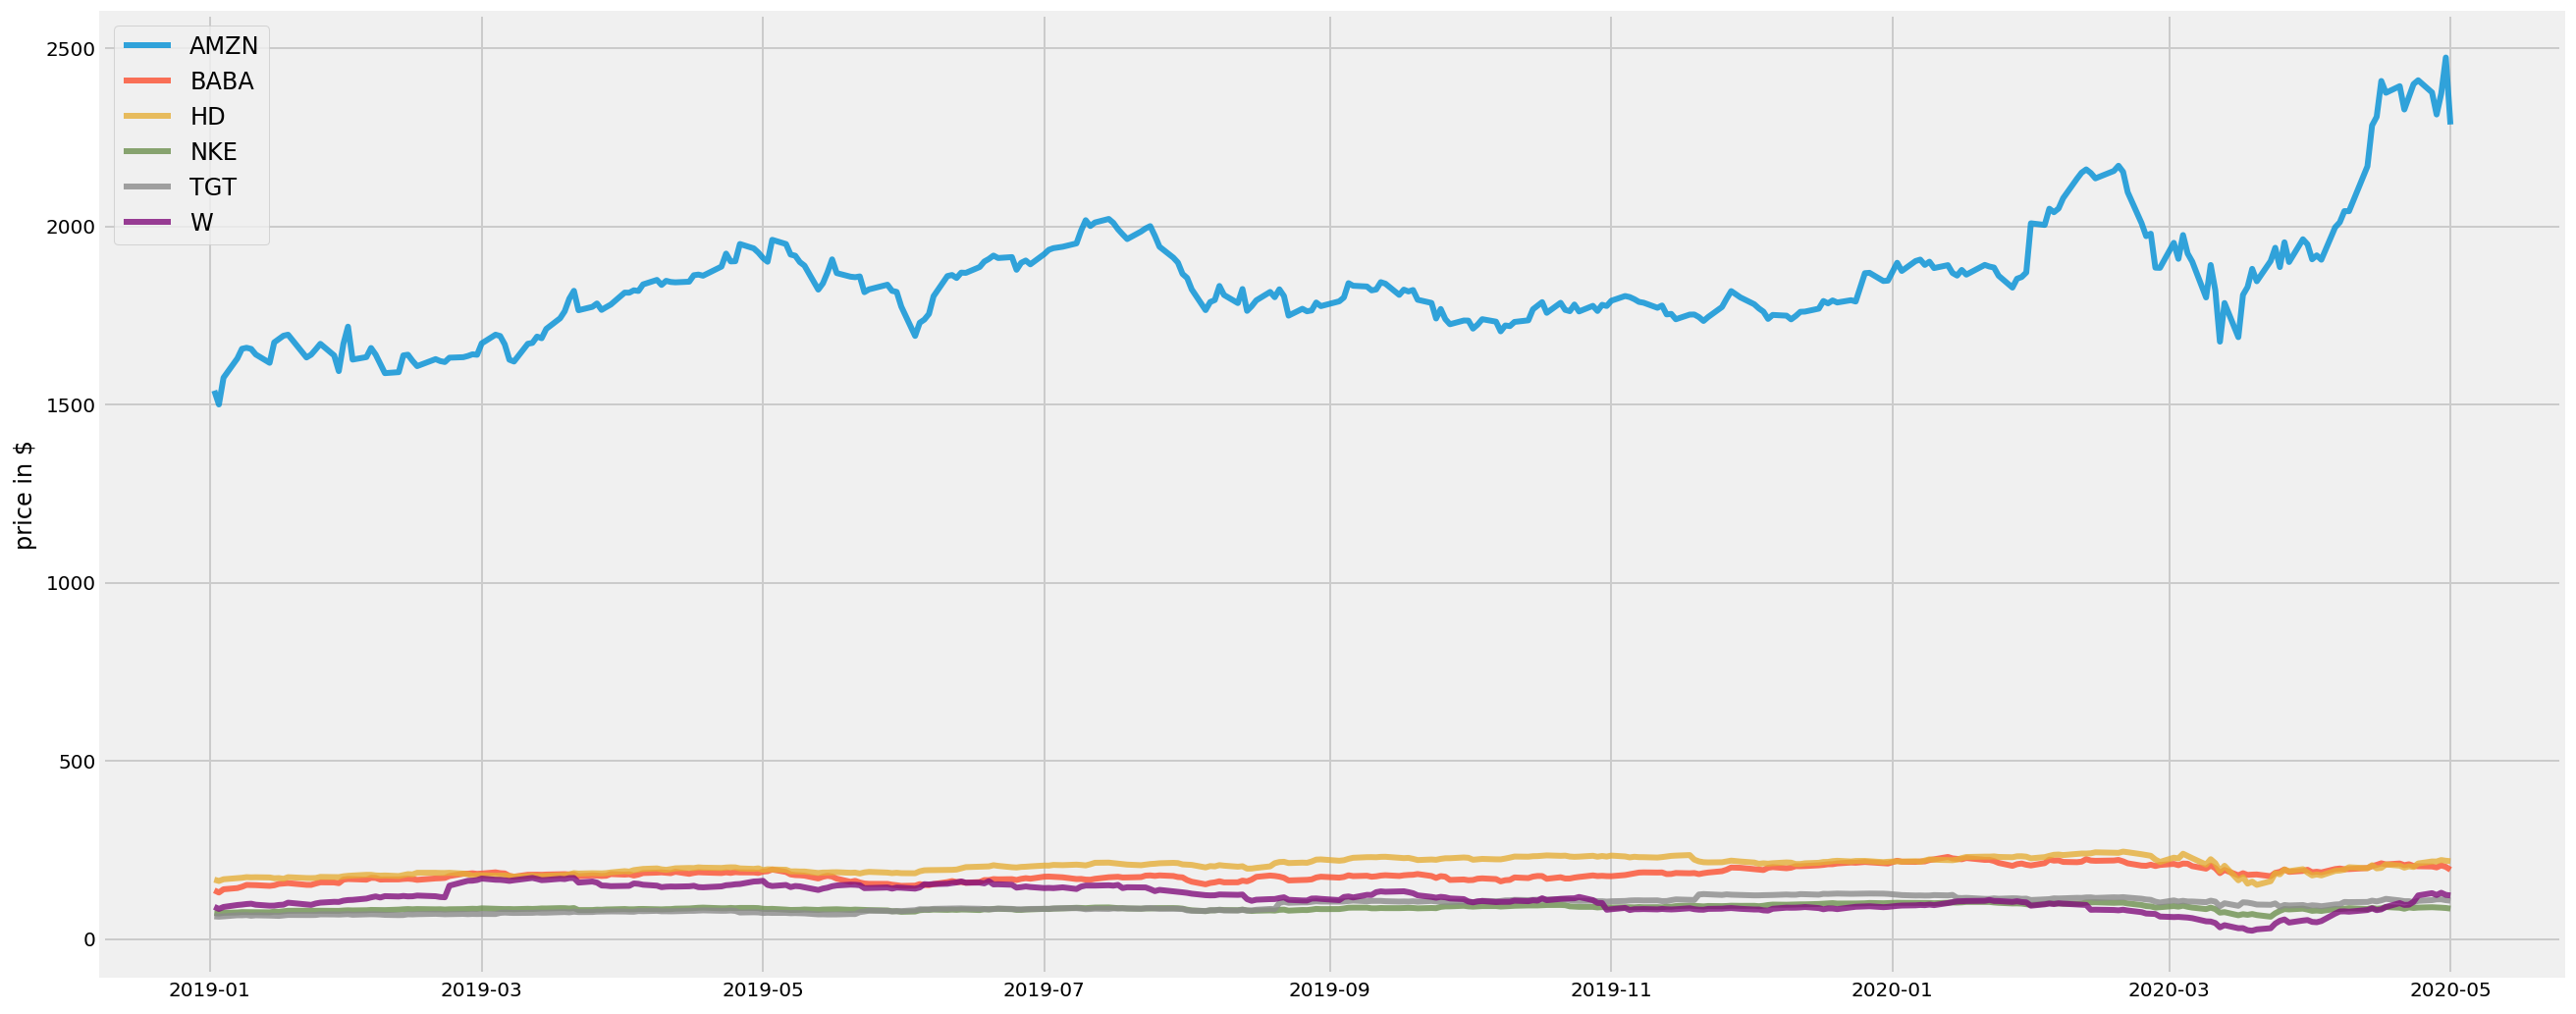

In [14]:
plt.figure(figsize=(20, 9))
for c in table.columns.values:
    plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('price in $')

### Simple returns

Text(0, 0.5, 'daily returns')

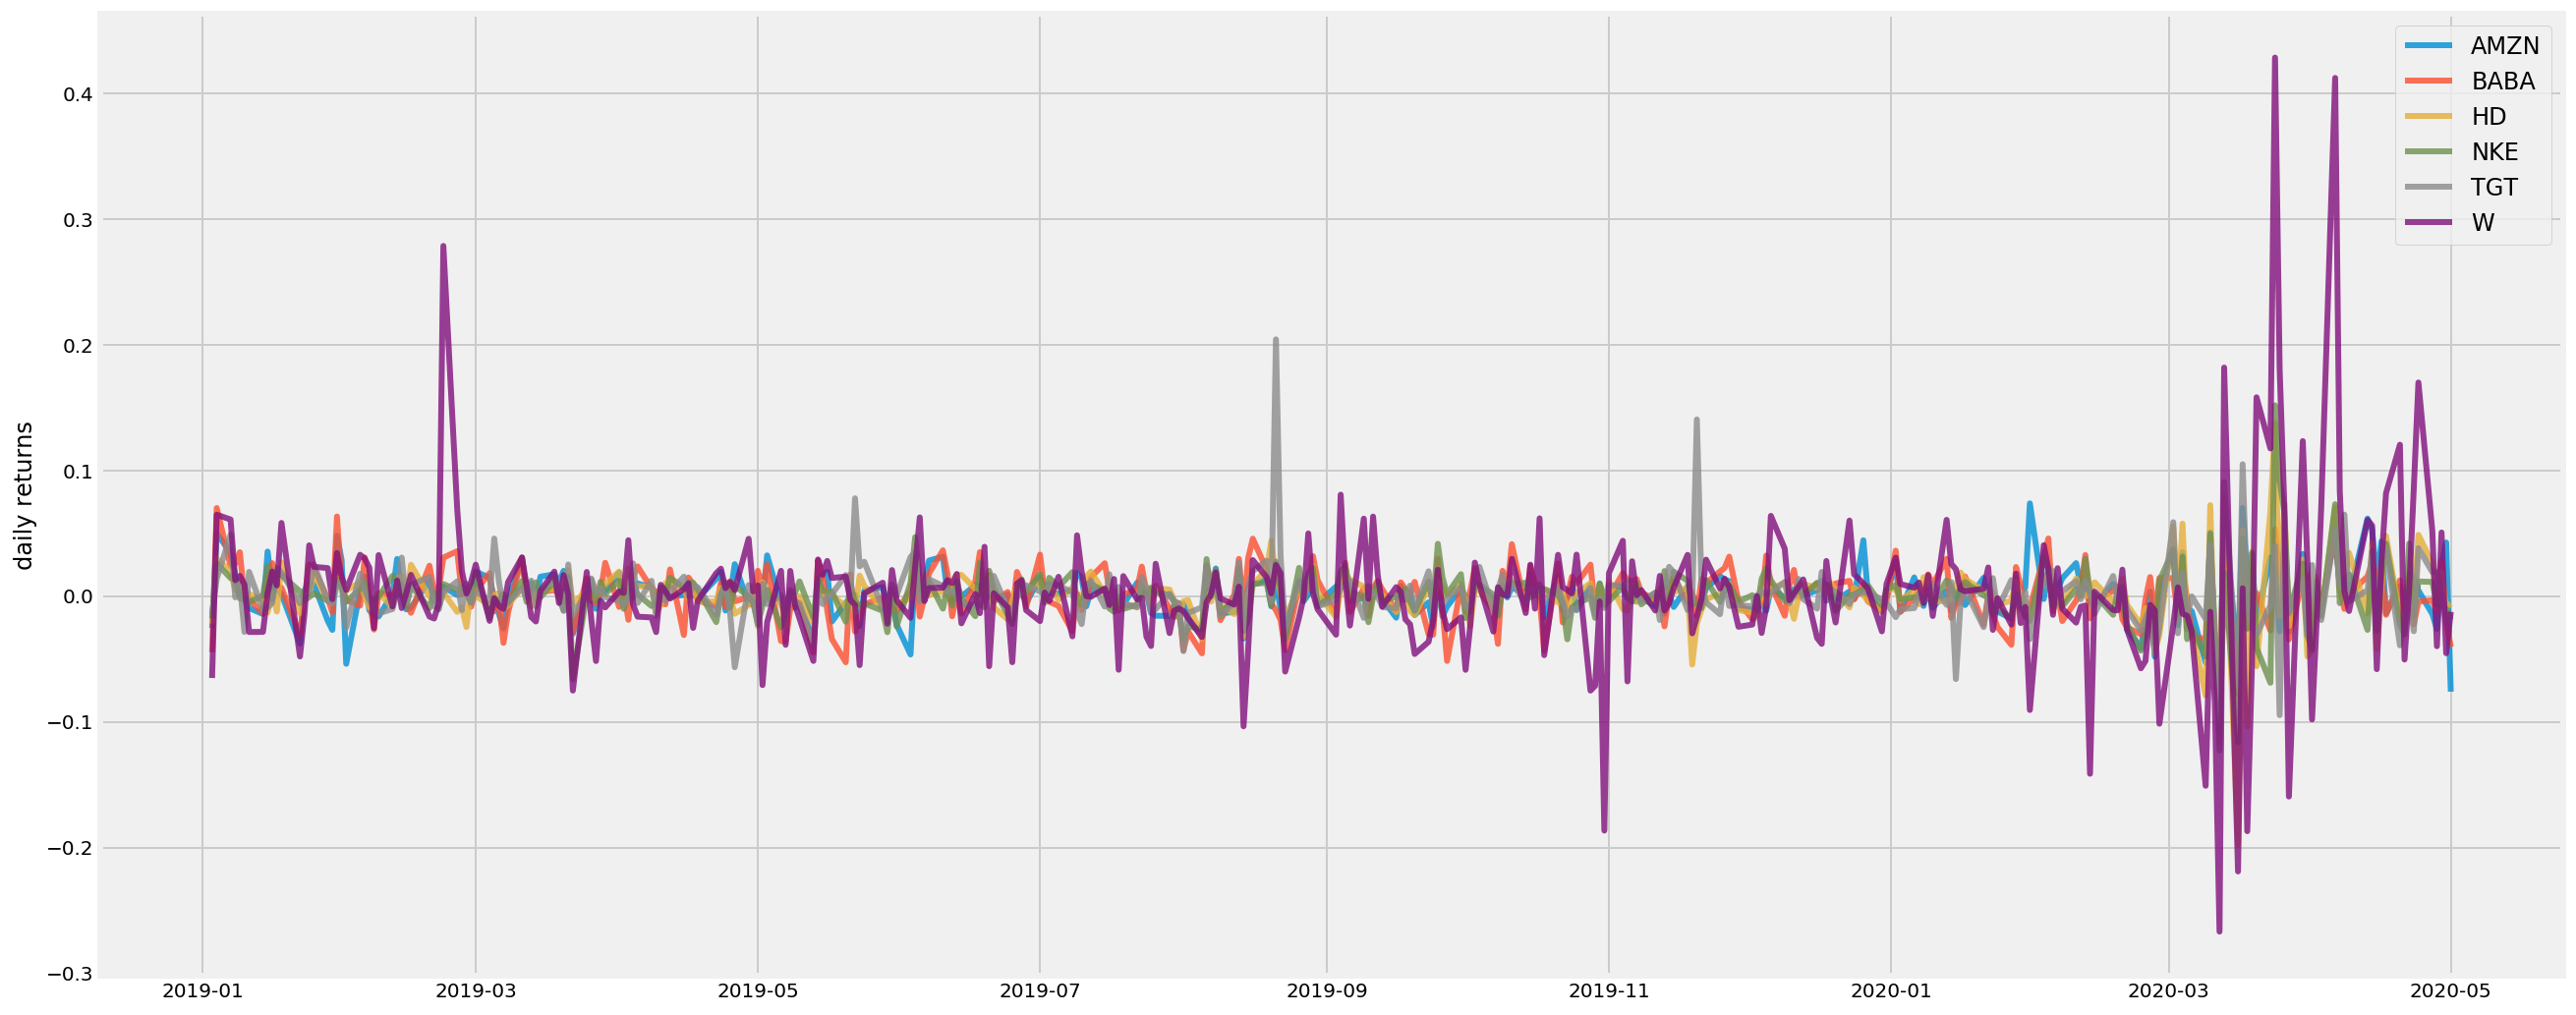

In [15]:
returns = table.pct_change()
plt.figure(figsize=(20, 9))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

### log returns

Text(0, 0.5, 'daily log returns')

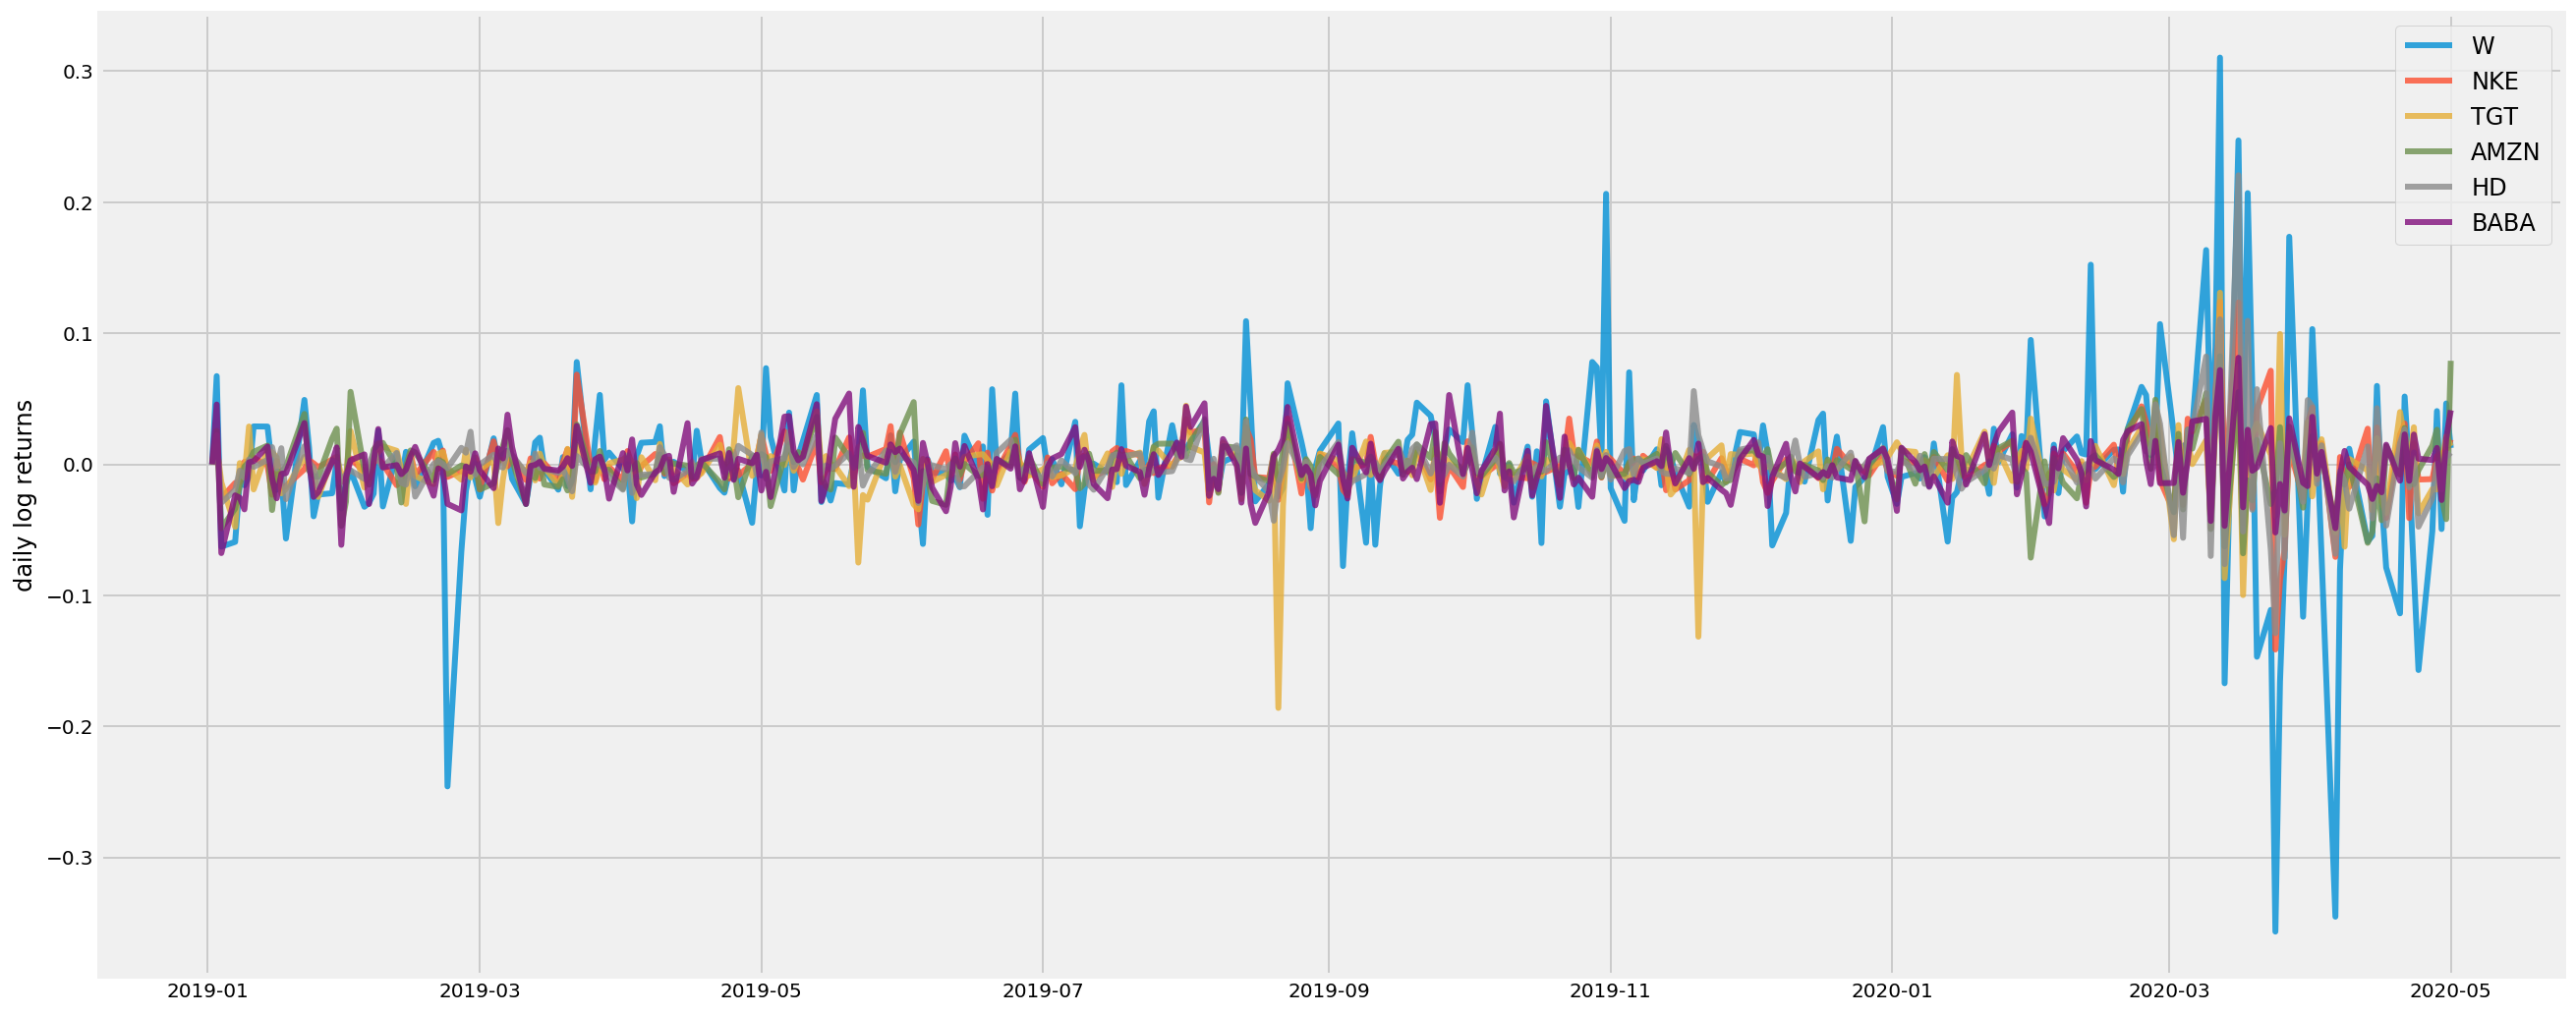

In [16]:
log = pd.DataFrame(columns = consumer, index = table.index)

for i in range(len(consumer)):
    log_list = []
    for j in range(len(table[consumer[i]])):
        if(j+1<len(table[consumer[i]])):
            log_returns =  np.log(table[consumer[i]][j]) - np.log(table[consumer[i]][j+1])
            log_list.append(log_returns)
            

        else:
            None
    log_list.insert(0, 0)   
    log[consumer[i]] = log_list


plt.figure(figsize=(20, 9))
for c in log.columns.values:
     plt.plot(log.index, log[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily log returns')


### Normalization to 100

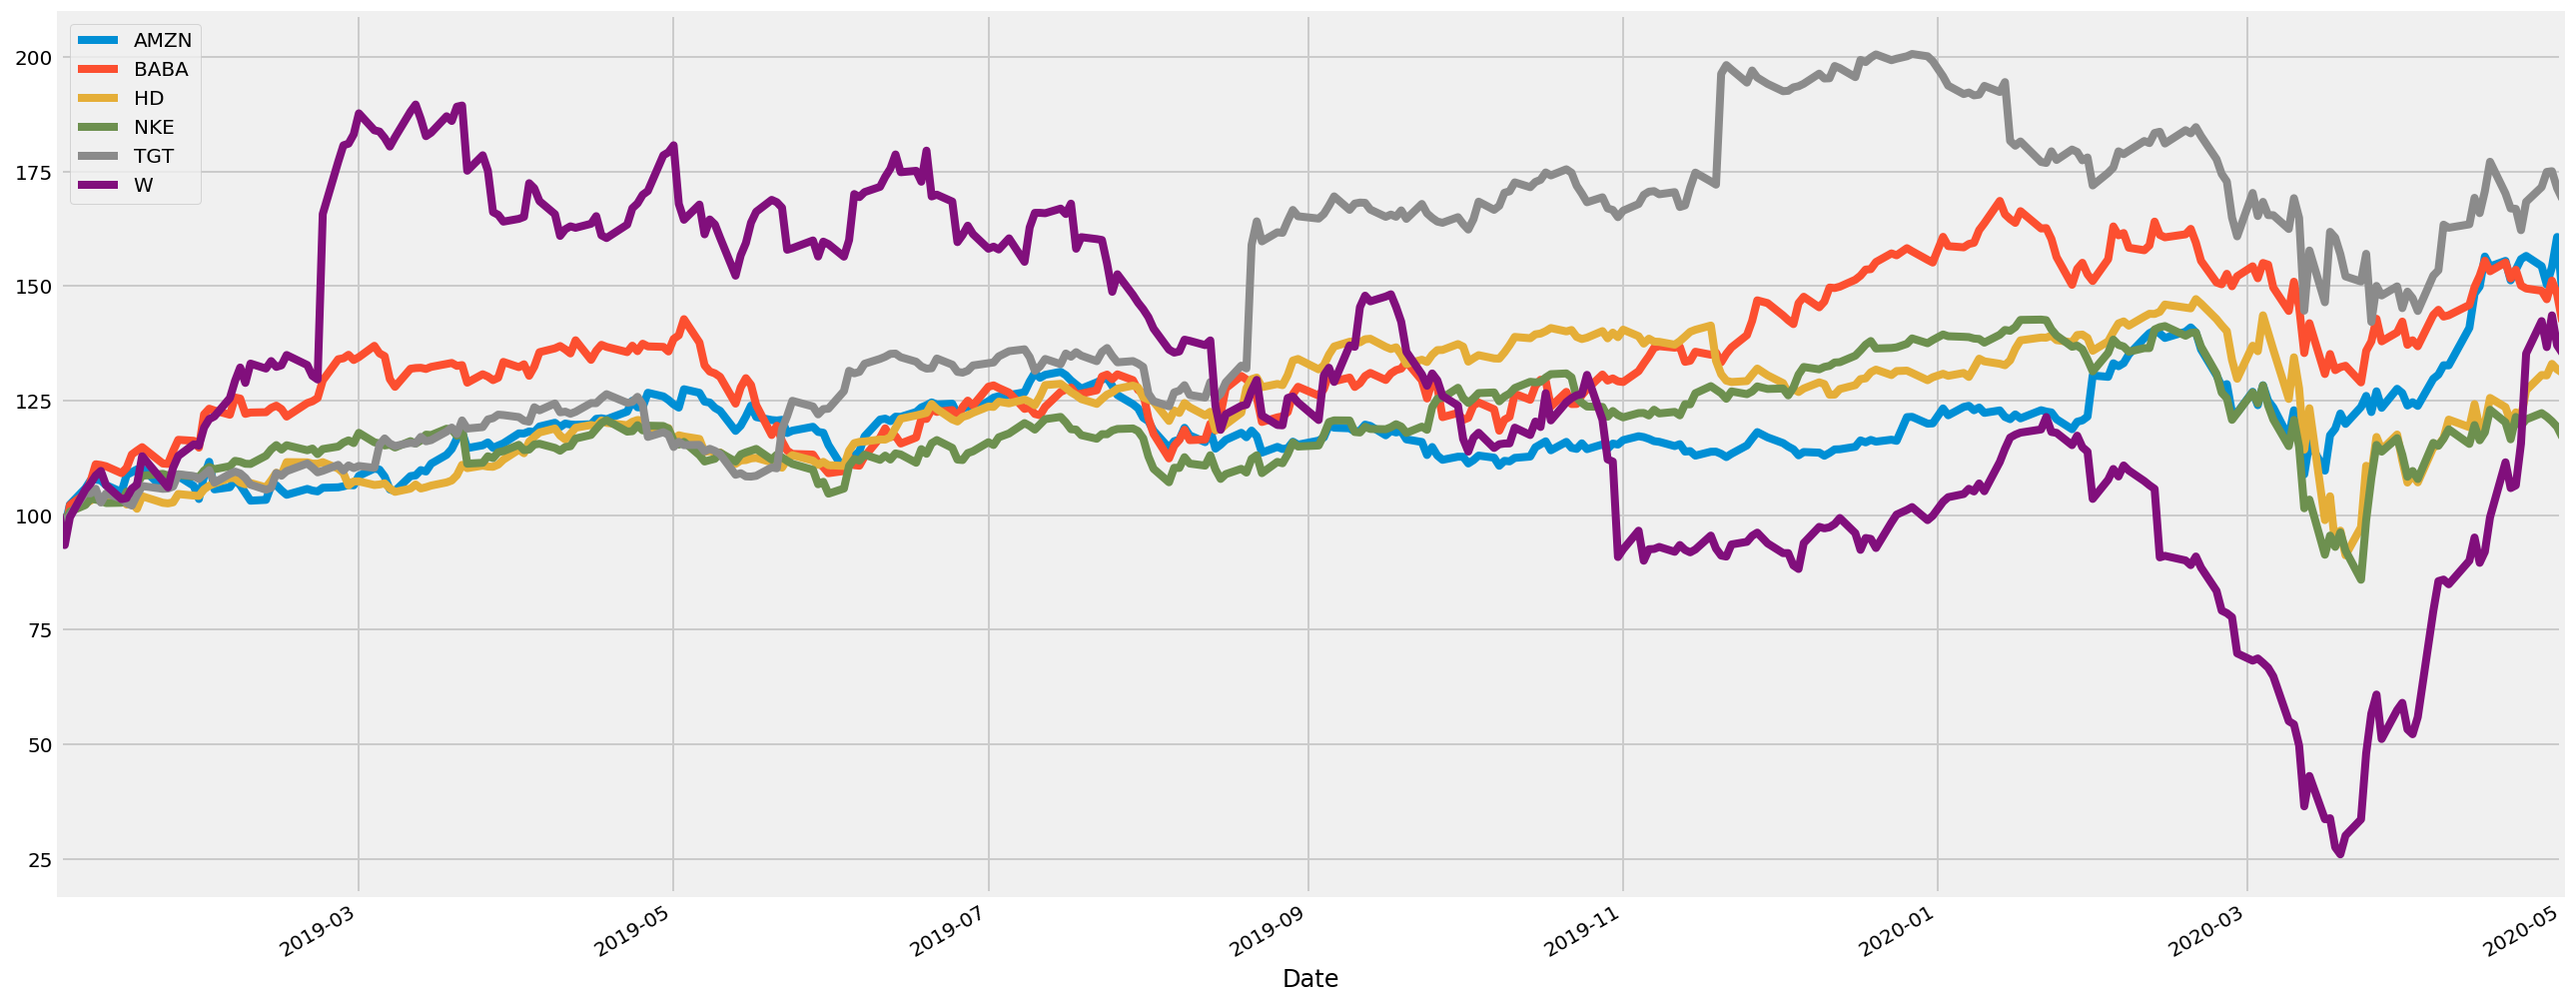

In [17]:
(table/table.iloc[0] * 100).plot(figsize = (20,9))
plt.show()

In [18]:
returns

,AMZN,BABA,HD,NKE,TGT,W
Date,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.025242,-0.044623,-0.022040,-0.017688,-0.013697,-0.065104
2019-01-04,0.050064,0.070061,0.029714,0.026117,0.013734,0.064791
2019-01-07,0.034353,0.023971,0.019698,0.014334,0.048923,0.060959
2019-01-08,0.016612,0.025786,0.004801,0.013339,-0.001004,0.012664
...,...,...,...,...,...,...
2020-04-27,-0.014198,-0.003279,0.026298,0.011316,0.019106,0.052283
2020-04-28,-0.026061,-0.012470,-0.000597,-0.006378,0.019294,-0.039826
2020-04-29,0.025336,0.027591,0.019207,-0.008221,0.000893,0.050615


In [19]:
log.mean()*252

W      -0.227320
NKE    -0.118061
TGT    -0.393745
AMZN   -0.296703
HD     -0.203078
BABA   -0.264405
dtype: float64

In [20]:
log.std()*252**0.5

W       0.905196
NKE     0.343404
TGT     0.384828
AMZN    0.305402
HD      0.384795
BABA    0.330562
dtype: float64

In [21]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
  
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((3,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(6)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return(results, weights_record)

mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 50000
risk_free_rate = 0.0073

def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print("-"*80)
    print( "Maximum Sharpe Ratio Portfolio Allocation\n")
    print( "Annualised Return:", round(rp,2))
    print( "Annualised Volatility:", round(sdp,2))
    print( "\n")
    print( max_sharpe_allocation)
    print( "-"*80)
    print("Minimum Volatility Portfolio Allocation\n")
    print("Annualised Return:", round(rp_min,2))
    print( "Annualised Volatility:", round(sdp_min,2))
    print( "\n")
    print( min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.39
Annualised Volatility: 0.28


             AMZN   BABA    HD  NKE    TGT     W
allocation  35.54  20.64  1.27  1.4  38.38  2.78
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.34
Annualised Volatility: 0.26


             AMZN   BABA    HD    NKE    TGT     W
allocation  39.38  25.91  1.97  11.84  20.91  0.01


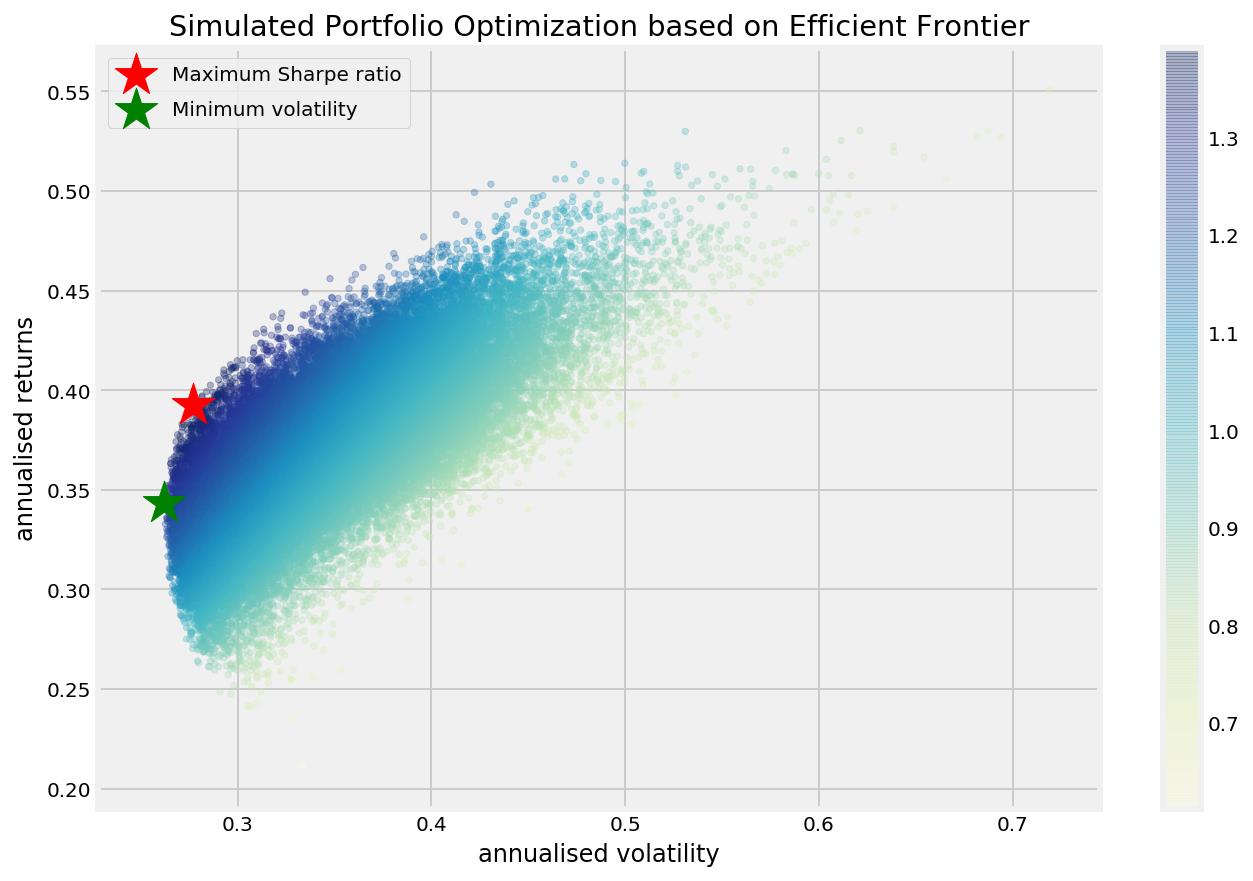

In [22]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)